In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import patches
import os
import random
import pickle

In [6]:
base_path = os.path.abspath(".")
config_output_filename = os.path.join(base_path, 'config_cdsw.pickle')

In [7]:
with open(config_output_filename, 'rb') as f_in:
	C = pickle.load(f_in)

# turn off any data augmentation at test time
C.use_horizontal_flips = False
C.use_vertical_flips = False
C.rot_90 = False

Using TensorFlow backend.
/home/mirandalv/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/mirandalv/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/mirandalv/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/mirandalv/anaconda3/lib/python3.6/site-pa

In [8]:
# Load the records
record_df = pd.read_csv(C.record_path)

r_epochs = len(record_df)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(np.arange(0, r_epochs), record_df['mean_overlapping_bboxes'], 'r')
plt.title('mean_overlapping_bboxes')

plt.subplot(1,2,2)
plt.plot(np.arange(0, r_epochs), record_df['class_acc'], 'r')
plt.title('class_acc')

plt.show()

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.plot(np.arange(0, r_epochs), record_df['loss_rpn_cls'], 'r')
plt.title('loss_rpn_cls')

plt.subplot(1,2,2)
plt.plot(np.arange(0, r_epochs), record_df['loss_rpn_regr'], 'r')
plt.title('loss_rpn_regr')
plt.show()
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(np.arange(0, r_epochs), record_df['loss_class_cls'], 'r')
plt.title('loss_class_cls')

plt.subplot(1,2,2)
plt.plot(np.arange(0, r_epochs), record_df['loss_class_regr'], 'r')
plt.title('loss_class_regr')
plt.show()
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(np.arange(0, r_epochs), record_df['curr_loss'], 'r')
plt.title('total_loss')

plt.subplot(1,2,2)
plt.plot(np.arange(0, r_epochs), record_df['elapsed_time'], 'r')
plt.title('elapsed_time')

plt.show()

AttributeError: 'Config' object has no attribute 'record_path'

In [ ]:
ROOT_DIR = os.path.abspath(".")
img_folder = r"/home/mirandalv/Documents/github/geo_AnimalDetection/dataset/processing_data/clipped"

In [3]:
test_df = pd.read_csv(os.path.join(ROOT_DIR, "bounding_box_coordinates_ans.csv"))
test_df['img_path'] = test_df.apply(lambda x: os.path.join(img_folder, x['img_name']), axis=1)

FileNotFoundError: [Errno 2] File b'/home/mirandalv/Documents/github/geo_AnimalDetection/bounding_box_coordinates_ans.csv' does not exist: b'/home/mirandalv/Documents/github/geo_AnimalDetection/bounding_box_coordinates_ans.csv'

In [36]:
test_df

,img_name,x1,y1,x2,y2,img_path
0,374.tif,0,192,48,224,/home/mirandalv/Documents/github/geo_AnimalDet...
1,374.tif,192,144,240,176,/home/mirandalv/Documents/github/geo_AnimalDet...
2,374.tif,96,160,144,192,/home/mirandalv/Documents/github/geo_AnimalDet...
3,374.tif,48,48,96,80,/home/mirandalv/Documents/github/geo_AnimalDet...
4,374.tif,32,208,64,240,/home/mirandalv/Documents/github/geo_AnimalDet...
...,...,...,...,...,...,...
64,523.tif,32,0,80,16,/home/mirandalv/Documents/github/geo_AnimalDet...
65,523.tif,80,224,128,240,/home/mirandalv/Documents/github/geo_AnimalDet...
66,523.tif,112,208,160,240,/home/mirandalv/Documents/github/geo_AnimalDet...
67,523.tif,112,224,160,240,/home/mirandalv/Documents/github/geo_AnimalDet...


In [35]:
img_count = test_df['img_name'].unique()

In [49]:
def plot_bbox_plt(img_name):
    
    img_url = test_df.loc[test_df["img_name"]==img_name]['img_path'].values[0]
    
    fig = plt.figure()

    #add axes to the image
    ax = fig.add_axes([0,0,1,1])

    # read and plot the image
    image = plt.imread(img_url)
    plt.imshow(image)

    # iterating over the image for different objects
    for _,row in test_df[test_df.img_name == img_name].iterrows():
        
        """
        xmin = row.miny
        xmax = row.maxy
        ymin = row.maxx
        ymax = row.minx
        """
        
        xmin = row.x1
        xmax = row.x2
        ymin = row.y1
        ymax = row.y2

    
        width = xmax - xmin
        height = ymax - ymin
    
        # assign different color to different classes of objects
        edgecolor = 'r'
        a = 20
        b = 20
        ax.annotate('bird', xy=(xmax-a,ymin+b))
        
        

        # add bounding boxes to the image
        rect = patches.Rectangle((xmin,ymin), width, height, edgecolor = edgecolor, facecolor = 'none')

        ax.add_patch(rect)

In [50]:
img_names = test_df["img_name"].value_counts().tail(50).index.values

In [51]:
img_ids

array(['523.tif', '473.tif', '374.tif', '430.tif'], dtype=object)

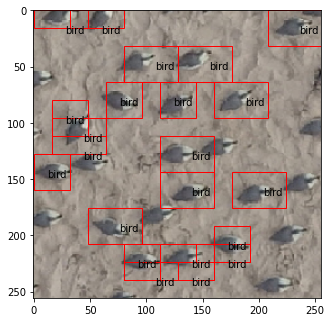

In [55]:
for img_name in random.sample(list(img_names), 1):
    #plot_bbox(img_id)
    plot_bbox_plt(img_name)